# CNN for key word detection

Date: March 23, 2019

## Preparing data set for CNN

In [2]:
DATASET_FOLDER = '../dataset/data_restaurant'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
#ds.serialize()
train_data, train_labels, test_data, test_labels = ds.generate()['mfsc']
shape = ds.shape
class_labels = ds.class_labels

In [3]:
shape

(64, 40)

### CNN model

In [4]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 6, 32)         4640      
__________

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training CNN

In [7]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1260 samples, validate on 540 samples
Epoch 1/50
1260/1260 [==============================] - 40s 32ms/step - loss: 4.1854 - acc: 0.0643 - val_loss: 2.7482 - val_acc: 0.1278
Epoch 2/50
1260/1260 [==============================] - 38s 30ms/step - loss: 2.7157 - acc: 0.1341 - val_loss: 2.5275 - val_acc: 0.2130
Epoch 3/50
1260/1260 [==============================] - 44s 35ms/step - loss: 2.4468 - acc: 0.2151 - val_loss: 2.2937 - val_acc: 0.3000
Epoch 4/50
1260/1260 [==============================] - 41s 32ms/step - loss: 2.1475 - acc: 0.3024 - val_loss: 1.9905 - val_acc: 0.4741
Epoch 5/50
1260/1260 [==============================] - 39s 31ms/step - loss: 1.8170 - acc: 0.4167 - val_loss: 1.4188 - val_acc: 0.6037
Epoch 6/50
1260/1260 [==============================] - 40s 32ms/step - loss: 1.5256 - acc: 0.4976 - val_loss: 1.0667 - val_acc: 0.7167
Epoch 7/50
1260/1260 [==============================] - 42s 33ms/step - loss: 1.2305 - acc: 0.5833 - val_loss: 0.8318 - val_acc: 0.8093
E

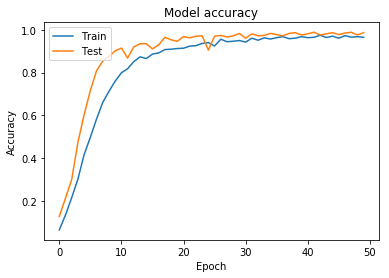

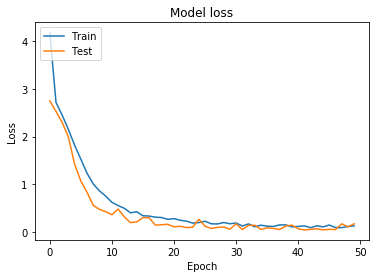

In [8]:
plot_accuracy(history)
plot_loss(history)

## Save the model

In [9]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/restaurant_cnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [10]:
del model
model = models.load_model(filename)

## Confirmation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
train_data.shape

(1260, 64, 40, 1)

In [12]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

In [13]:
class_labels

['umai',
 'mazui',
 'oishii',
 'silence',
 'others',
 'a',
 'i',
 'o',
 'sushi',
 'sashimi',
 'gyouza',
 'hashi',
 'spoon',
 'fork',
 'syouyu',
 'sakana',
 'niku',
 'gohan']

In [14]:
(activations[-1][:10]*100).astype(int)

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  99,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,
          0,   0,   0,   0,   0],
       [  7,   6,   4,   8,   8,   5,   6,   5,   3,   4,   4,   4,   4,
          5,   4,   4,   6,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 100,   0,   0,   0],
       [  7,   6,   4,   8,   8,   5,   6,   5,   3,   4,   4,   4,   4,
          5,   4,   4,   6,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,
          0,   0,   0,   0,   0],
       [  0,  99,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,

In [15]:
test_labels[:10].astype(int)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

'oishii'

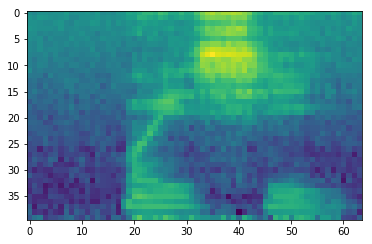

In [16]:
image_number = 24

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

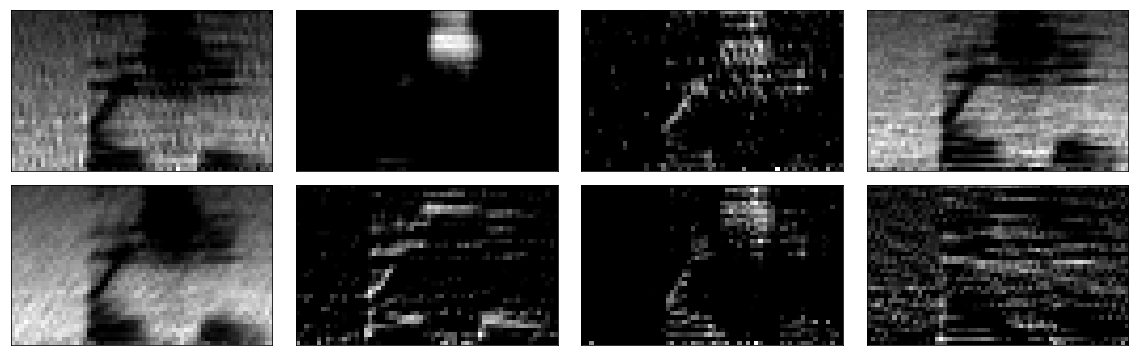

In [19]:
plot_layer(activations, image_number, 0, 4)

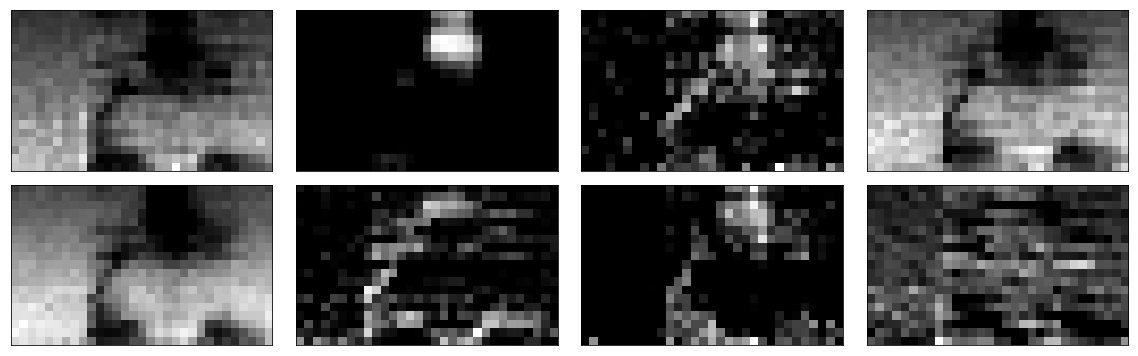

In [20]:
plot_layer(activations, image_number, 1, 4)

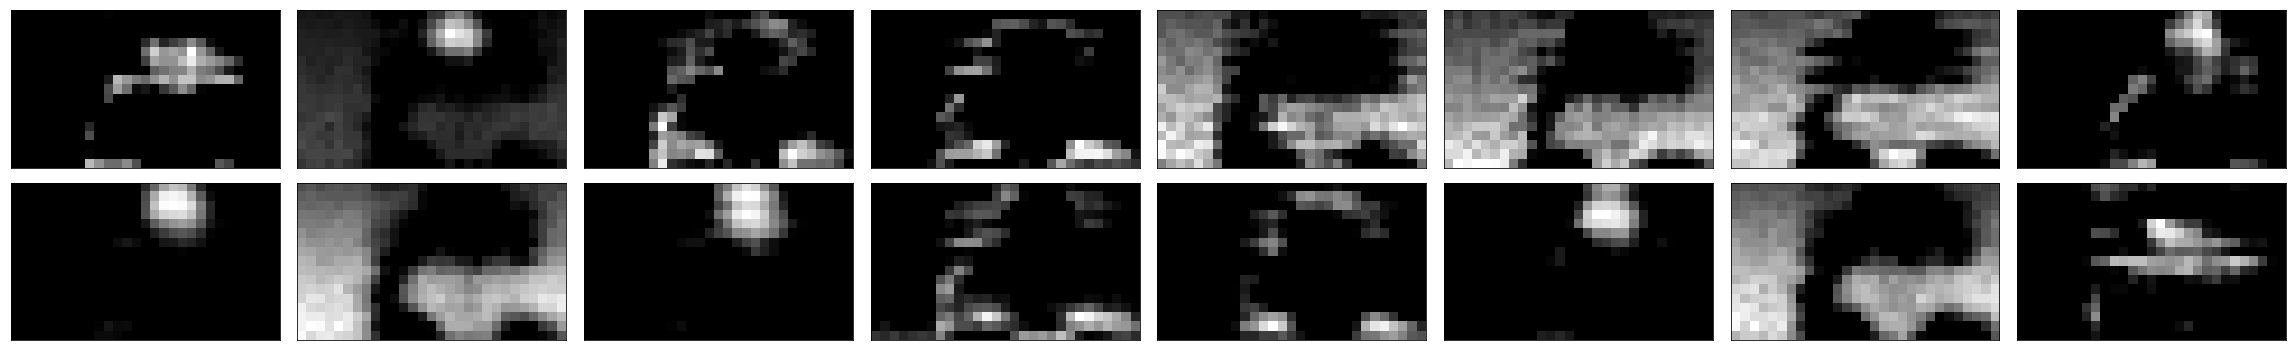

In [21]:
plot_layer(activations, image_number, 3, 8)

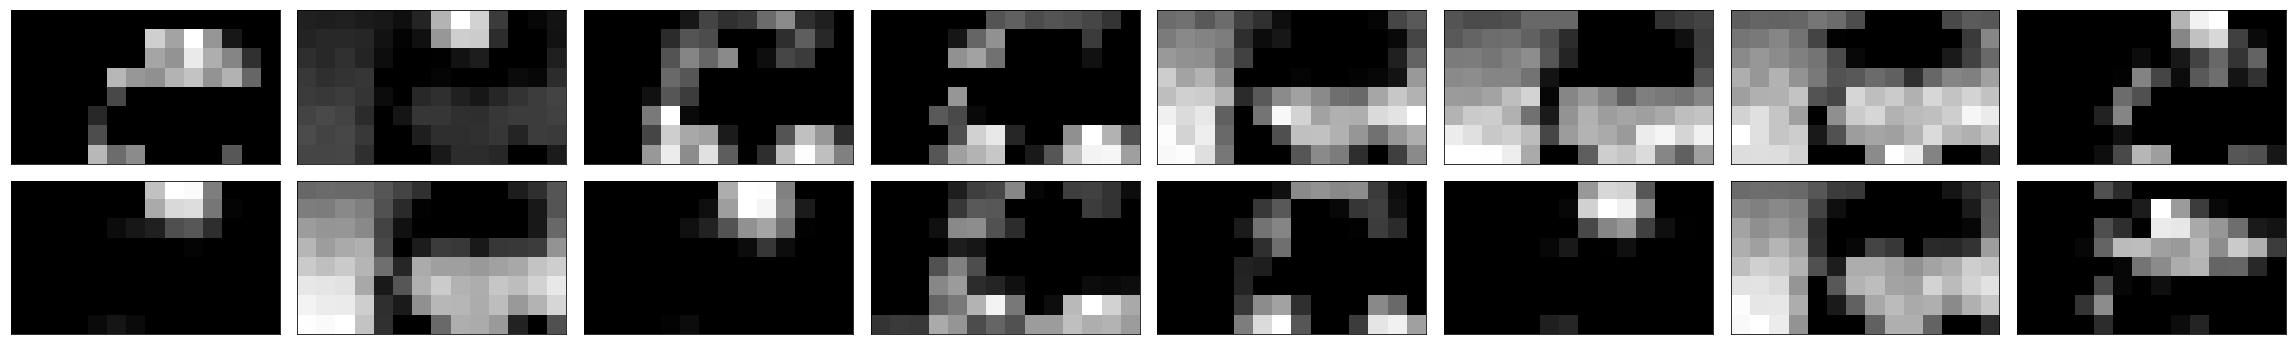

In [22]:
plot_layer(activations, image_number, 4, 8)

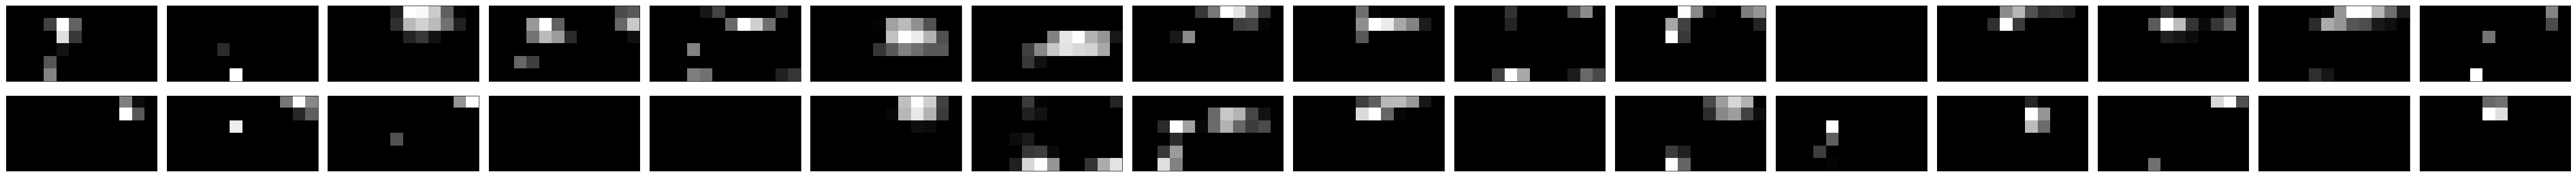

In [23]:
plot_layer(activations, image_number, 6, 16)

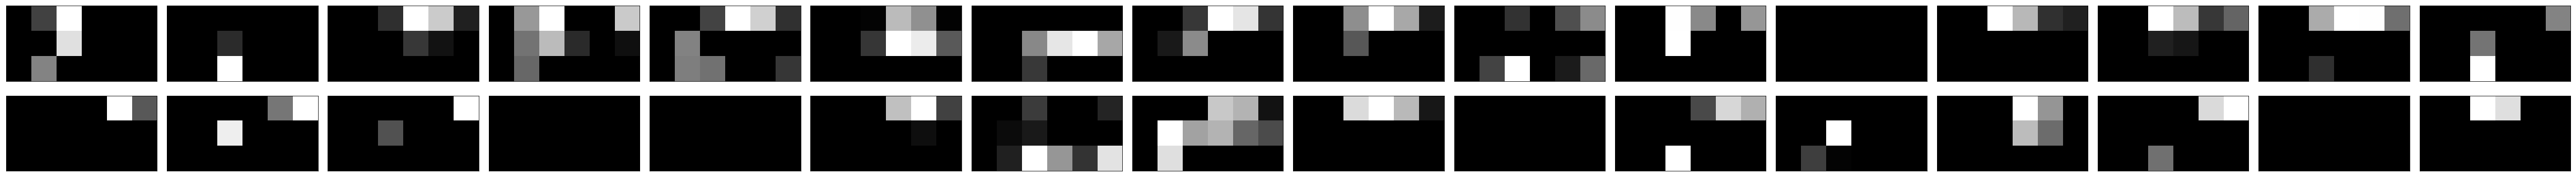

In [24]:
plot_layer(activations, image_number, 7, 16)